## 해시태그 데이터로 워드클라우드 만들기

In [21]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 제주핫플레이스.csv to 제주핫플레이스.csv


In [2]:
import pandas as pd
raw_df = pd.read_csv('제주핫플레이스.csv')
raw_df.tags[:3]

0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1    ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2    ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
Name: tags, dtype: object

In [3]:
tags = raw_df.tags[0]
tags[2:-2].split("', '")

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이']

In [4]:
tags_total = []
for tags in raw_df.tags:
    tags_total.extend(tags[2:-2].split("', '"))

## 해시태그 출현 빈도

- collections 모듈

In [5]:
from collections import Counter, OrderedDict

In [6]:
s = 'A qucik brown fox jumps over the lazy dog.'
Counter(s)

Counter({' ': 8,
         '.': 1,
         'A': 1,
         'a': 1,
         'b': 1,
         'c': 1,
         'd': 1,
         'e': 2,
         'f': 1,
         'g': 1,
         'h': 1,
         'i': 1,
         'j': 1,
         'k': 1,
         'l': 1,
         'm': 1,
         'n': 1,
         'o': 4,
         'p': 1,
         'q': 1,
         'r': 2,
         's': 1,
         't': 1,
         'u': 2,
         'v': 1,
         'w': 1,
         'x': 1,
         'y': 1,
         'z': 1})

In [7]:
sl = ['A', 'qucik', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog.']
Counter(sl)

Counter({'A': 1,
         'brown': 1,
         'dog.': 1,
         'fox': 1,
         'jumps': 1,
         'lazy': 1,
         'over': 1,
         'qucik': 1,
         'the': 1})

In [8]:
d = dict()
d['x'] = 1
d['k'] = 2
d['m'] = 3
d

{'k': 2, 'm': 3, 'x': 1}

In [9]:
od = OrderedDict()
od['x'] = 1
od['k'] = 2
od['m'] = 3
od

OrderedDict([('x', 1), ('k', 2), ('m', 3)])

In [10]:
for k,v in od.items():
    print(k)

x
k
m


- 해시태그 빈도 집계

In [11]:
tag_counts = Counter(tags_total)

In [12]:
# Top 50
tag_counts.most_common(50)

[('#제주관광', 2827),
 ('#제주여행', 1302),
 ('#제주도', 849),
 ('#제주', 789),
 ('#서귀포', 688),
 ('#제주맛집', 612),
 ('#제주도여행', 512),
 ('#제주반영구', 438),
 ('#제주도관광', 438),
 ('#제주눈썹문신', 432),
 ('#서귀포맛집', 420),
 ('#서귀포눈썹문신', 419),
 ('#jeju', 407),
 ('#제주시', 398),
 ('#제주자연눈썹', 396),
 ('#눈썹문신', 396),
 ('#서귀포남자눈썹문신', 394),
 ('#서귀포자연눈썹', 394),
 ('#제주남자눈썹문신', 394),
 ('#서귀포속눈썹', 394),
 ('#제주속눈썹', 394),
 ('#서귀포반영구', 394),
 ('#반영구', 394),
 ('#제주도민', 391),
 ('#제주도맛집', 389),
 ('#제주메이크업', 358),
 ('#제주핫플레이스', 352),
 ('#제주핫플', 328),
 ('#제주가볼만한곳', 308),
 ('#제주속눈썹연장', 304),
 ('#제주살이', 301),
 ('#제주해안도로', 295),
 ('#첫줄', 265),
 ('#서귀포문신', 263),
 ('#선팔', 258),
 ('#셀카', 248),
 ('#제주스타그램', 247),
 ('#제주문신', 238),
 ('#jejuisland', 217),
 ('#여행스타그램', 214),
 ('#제주실탄사격장', 212),
 ('#제주두피반영구', 210),
 ('#제주실내관광지', 208),
 ('#서귀포여행', 195),
 ('#제주반영구수강', 191),
 ('#제주도여행코스', 189),
 ('#두피반영구', 187),
 ('#제주도가볼만한곳', 183),
 ('#일상', 182),
 ('#제주버스여행', 181)]

In [18]:
# 데이터 정제하기
stopwords = ['#jeju', '#일상', '#제주', '', '#제주도', '#선팔', '#제주눈썹문신',
             '#서귀포눈썹문신', '#반영구', '눈썹문신', '#두피반영구']
'''tag_total_refined = []
for tag in tags_total:
    if tag not in stopwords:
        tag_total_refined.append(tag)'''
tag_total = [tag for tag in tags_total if tag not in stopwords]

tag_counts = Counter(tag_total)
tag_counts.most_common(50)

[('#제주관광', 2827),
 ('#제주여행', 1302),
 ('#서귀포', 688),
 ('#제주맛집', 612),
 ('#제주도여행', 512),
 ('#제주반영구', 438),
 ('#제주도관광', 438),
 ('#서귀포맛집', 420),
 ('#제주시', 398),
 ('#제주자연눈썹', 396),
 ('#눈썹문신', 396),
 ('#서귀포남자눈썹문신', 394),
 ('#서귀포자연눈썹', 394),
 ('#제주남자눈썹문신', 394),
 ('#서귀포속눈썹', 394),
 ('#제주속눈썹', 394),
 ('#서귀포반영구', 394),
 ('#제주도민', 391),
 ('#제주도맛집', 389),
 ('#제주메이크업', 358),
 ('#제주핫플레이스', 352),
 ('#제주핫플', 328),
 ('#제주가볼만한곳', 308),
 ('#제주속눈썹연장', 304),
 ('#제주살이', 301),
 ('#제주해안도로', 295),
 ('#첫줄', 265),
 ('#서귀포문신', 263),
 ('#셀카', 248),
 ('#제주스타그램', 247),
 ('#제주문신', 238),
 ('#jejuisland', 217),
 ('#여행스타그램', 214),
 ('#제주실탄사격장', 212),
 ('#제주두피반영구', 210),
 ('#제주실내관광지', 208),
 ('#서귀포여행', 195),
 ('#제주반영구수강', 191),
 ('#제주도여행코스', 189),
 ('#제주도가볼만한곳', 183),
 ('#제주버스여행', 181),
 ('#제주카페', 179),
 ('#여행', 175),
 ('#제주도가족여행', 172),
 ('#제주눈썹예쁜곳', 164),
 ('#서귀포반영구수강', 162),
 ('#제주도실내관광지', 156),
 ('#제주관광지', 153),
 ('#제주커플여행', 149),
 ('#제주도커플여행', 144)]

## 워드 클라우드 만들기

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [26]:
! ls -l /usr/share/fonts/truetype/nanum

total 28836
-rw-r--r-- 1 root root 4413912 Dec  3  2017 NanumBarunGothicBold.ttf
-rw-r--r-- 1 root root 4184028 Dec  3  2017 NanumBarunGothic.ttf
-rw-r--r-- 1 root root 4642244 Dec  3  2017 NanumGothicBold.ttf
-rw-r--r-- 1 root root 4691820 Dec  3  2017 NanumGothic.ttf
-rw-r--r-- 1 root root 4183592 Dec  3  2017 NanumMyeongjoBold.ttf
-rw-r--r-- 1 root root 3839464 Dec  3  2017 NanumMyeongjo.ttf
-rw-r--r-- 1 root root  733500 Dec  3  2017 NanumSquareB.ttf
-rw-r--r-- 1 root root 1030948 Dec  3  2017 NanumSquareRoundB.ttf
-rw-r--r-- 1 root root 1063276 Dec  3  2017 NanumSquareRoundR.ttf
-rw-r--r-- 1 root root  723640 Dec  3  2017 NanumSquareR.ttf


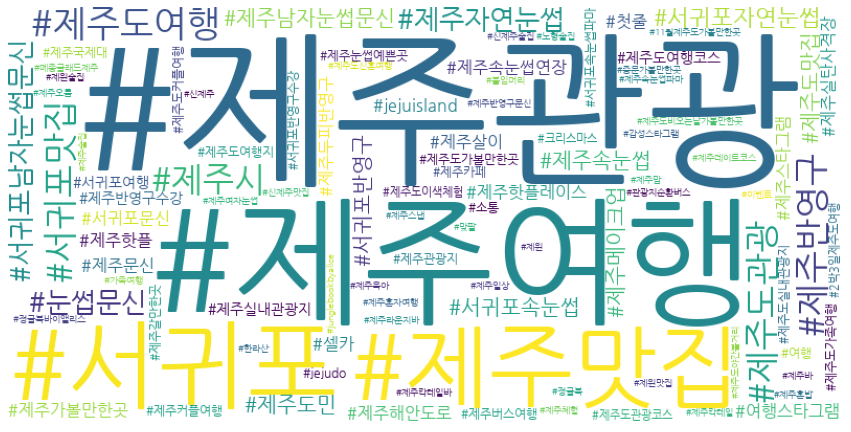

In [27]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=path,
                      background_color = 'white',
                      max_words=100,
                      relative_scaling = 0.3,
                      width = 800, height = 400
                      ).generate_from_frequencies(tag_counts)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()